<center> <h1>PREDICIÓN DEL SUEÑO CON MLP MULTICLASE</h1> </center>
<center> <h4>Noemi González, Roberto Holgado y Carmen Plaza seco</h4> </center>


###### Indice

En este jupyter notebook se lleva a cabo la construcción de un clasificador MLP de salida multiclase para predecir el el estado de vigilia o sueño ligero y  el de sueño profundo.

    1. Clasficador MLP multiclase
        1.1 Preparación datos de entrada y salida
        1.2 Creación del modelo y selección parámetros libres
        1.3 Evaluación del modelo
        1.4 Visualización de resultados

IMPORTAR MÓDULOS

In [1]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import sklearn

## 1. CLASIFICADOR MLP MULTICLASE

Se ha utilizado un perceptrón multicapa para clasificar las distintas fases del sueño. Es decir, se ha construido un clasificador con salida multiclase.

### 1.1 Preparación datos de entrada y salida

In [2]:
Train_multi= pd.read_csv('Train_multiclass.csv')
Test_multi= pd.read_csv('Test_multiclass.csv')

In [3]:
X_train_multi=Train_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1) 
y_train_multi=Train_multi['Etiquetas multiclase']

X_test_multi=Test_multi.drop(['Etiquetas multiclase', 'Etiquetas binarias','ID'], axis = 1)
y_test_multi=Test_multi['Etiquetas multiclase']

### 1.2  Creación del modelo y selección parámetros libres

Se proponen posibles valores de neuronas en la capa oculta para ver con cuál de ellos se obtienen las mejores prestaciones para el modelo. Se crea una tabla que recoge la pérdidas para cada valor del número de neuronas y aquel que tenga menos pérdida es el que se utilizará para el conjunto de test.

Se estudia el número de neuronas para un rango de 4 a 20 cogiendo los valores con saltos de 3.

In [4]:
# Tabla para recoger las prestaciones en train 
columns  = ['Loss','Score']
comp_train = pd.DataFrame(columns=columns)


In [5]:
# Número de neuronas de la capa oculta
n_hidden=range(4,20,3)

for i in n_hidden:
    
    print('\033[4;32m' + 'MLP clasiffier with',i,'neurons in the hidden layer' + '\033[0m')

    model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=(i,), learning_rate='constant',
        learning_rate_init=0.1, max_iter=30, shuffle=True, solver='sgd', tol=0.01, early_stopping=True,
        validation_fraction=0.2, verbose=True, n_iter_no_change=5)

    model.fit(X_train_multi, y_train_multi)
    
    loss=model.loss_  
    comp_train = comp_train.set_value(i,('Loss','Score'),(loss,'Verbose'))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = 4.90124145
Validation score: 0.174194
Iteration 2, loss = 1.62705733
Validation score: 0.174194
Iteration 3, loss = 1.62419034
Validation score: 0.174194
Iteration 4, loss = 1.62382126
Validation score: 0.174194
Iteration 5, loss = 1.62516527
Validation score: 0.174194
Iteration 6, loss = 1.62314476
Validation score: 0.174194
Iteration 7, loss = 1.62227433
Validation score: 0.174194
Validation score did not improve more than tol=0.010000 for 5 consecutive epochs. Stopping.
MLP clasiffier with 7 neurons in the hidden layer
Iteration 1, loss = 3.17328272
Validation score: 0.187097
Iteration 2, loss = 1.62070986
Validation score: 0.245161
Iteration 3, loss = 1.62174178
Validation score: 0.187097
Iteration 4, loss = 1.62237219
Validation score: 0.193548
Iteration 5, loss = 1.62128208
Validation score: 0.167742
Iteration 6, loss = 1.62153551
Validation score: 0.187097
Iteration 7, loss = 1.62165856
Validation score: 0.245

/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel 

Validation score: 0.187097
Iteration 4, loss = 1.62490117
Validation score: 0.180645
Iteration 5, loss = 1.62215499
Validation score: 0.258065
Iteration 6, loss = 1.62343188
Validation score: 0.258065
Iteration 7, loss = 1.62487824
Validation score: 0.258065
Validation score did not improve more than tol=0.010000 for 5 consecutive epochs. Stopping.
MLP clasiffier with 16 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.258065
Iteration 2, loss = 3.85017163
Validation score: 0.167742
Iteration 3, loss = 4.51715804
Validation score: 0.174194
Iteration 4, loss = 4.70302695
Validation score: 0.174194
Iteration 5, loss = 4.75193633
Validation score: 0.258065
Iteration 6, loss = 4.76719666
Validation score: 0.258065
Iteration 7, loss = 4.76800763
Validation score: 0.174194
Validation score did not improve more than tol=0.010000 for 5 consecutive epochs. Stopping.
MLP clasiffier with 19 neurons in the hidden layer
Iteration 1, loss = inf
Validation score: 0.148387
Itera

/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


Las medidas de prestación elegidas para la elección de una topología han sido el validation score y la pérdida. Ambas se pueden ver al aplicar el fit del modelo, gracias al parámetro verbose=True. La pérdida la hemos añadido a la siguiente tabla pero la accuracy de cada epoch para el conjunto de validación hay que verla en la celda anterior. Según estos resultados, la mejor topología de MLP sería la de **n_hidden_1 con X neuronas** en la capa oculta, ya que el par (loss,val_score) es el mejor.
En todos los casos el valor 'validation score' está entorno a 0.66, pero el número de neuronas de menor pérdida es X.

In [6]:
comp_train

,Loss,Score
4,1.62227,Verbose
7,1.62187,Verbose
10,1.61811,Verbose
13,1.62488,Verbose
16,4.76801,Verbose
19,1.77278,Verbose


### 1.3 Evaluación del modelo

Testeamos el modelo con el número de neuronas en la capa oculta que ofrece la menor pérdida (número neuronas = X)

In [7]:
columns  = ['Accuracy','Recall','F1-score']
comp_test = pd.DataFrame(columns=columns)

print('\033[4;32m' + 'MLP clasiffier with 4 neurons in the hidden layer' + '\033[0m')

model=MLPClassifier(activation='relu', batch_size=50, hidden_layer_sizes=4, learning_rate='constant',
    learning_rate_init=0.1, max_iter=30, shuffle=True, solver='sgd', tol=0.01, early_stopping=True,
    validation_fraction=0.2, verbose=True, n_iter_no_change=5)

model.fit(X_train_multi,y_train_multi)

predictions = model.predict(X_test_multi)
cr=classification_report(y_test_multi,predictions,output_dict=True)
acc,rec,f1=cr['weighted avg']['precision'],cr['weighted avg']['recall'],cr['weighted avg']['f1-score']

comp_test = comp_test.set_value('4', ('Accuracy','Recall','F1-score'),(acc,rec,f1))

MLP clasiffier with 4 neurons in the hidden layer
Iteration 1, loss = 5.24943964
Validation score: 0.212903
Iteration 2, loss = 1.63525914
Validation score: 0.187097
Iteration 3, loss = 1.63133611
Validation score: 0.212903
Iteration 4, loss = 1.62515441
Validation score: 0.212903
Iteration 5, loss = 1.62675030
Validation score: 0.212903
Iteration 6, loss = 1.62477264
Validation score: 0.187097
Iteration 7, loss = 1.62752178
Validation score: 0.212903
Validation score did not improve more than tol=0.010000 for 5 consecutive epochs. Stopping.


/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/envs/cuarto/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [8]:
comp_test

,Accuracy,Recall,F1-score
4,0.022434,0.14978,0.0390231


In [9]:
print("================Classification Report=================")
print(cr)

================Classification Report=================
{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 50}, '1.0': {'precision': 0.14977973568281938, 'recall': 1.0, 'f1-score': 0.26053639846743293, 'support': 34}, '2.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 48}, '3.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 50}, '5.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 45}, 'accuracy': 0.14977973568281938, 'macro avg': {'precision': 0.029955947136563875, 'recall': 0.2, 'f1-score': 0.05210727969348659, 'support': 227}, 'weighted avg': {'precision': 0.022433969221215235, 'recall': 0.14977973568281938, 'f1-score': 0.039023072898205814, 'support': 227}}


### 1.5 Visualización de resultados
A continuación se muestra un ejemplo de las fases del sueño predichas frente a las reales. Para facilitar esta visualización, se muestran la mitad de la muestras del subconjunto de test. 

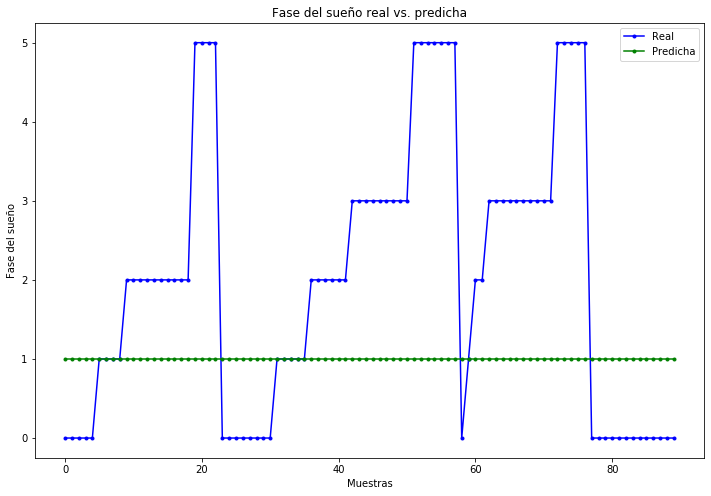

In [10]:
plt.figure(figsize=(12,8))
plt.plot(y_test_multi[0:90],color='blue', marker='.',label='Real')
plt.plot(predictions[0:90],color='green', marker='.',label='Predicha')

plt.title('Fase del sueño real vs. predicha')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()

**Residuos**

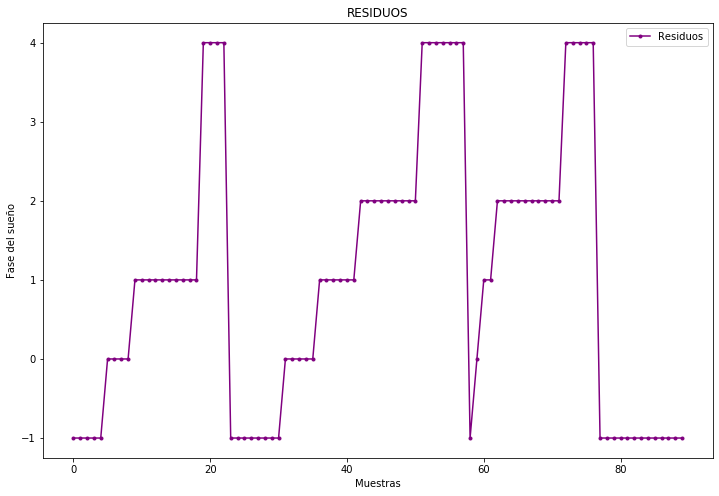

In [11]:
residuos= y_test_multi - predictions
plt.figure(figsize=(12,8))
plt.plot(residuos[0:90],color='purple', marker='.',label='Residuos')

plt.title('RESIDUOS')
plt.xlabel('Muestras')
plt.ylabel('Fase del sueño')
plt.legend()